In [3]:
#importing libraries
#pandas and numpy for data manipulation
import numpy as np
import pandas as pd

#matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#sns.set(font_scale = 2)


#importing warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')


#importing stats from scipy
from scipy import stats

In [4]:
#loading data file
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

#display top of dataset
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
#Display the shape of dataset 
data.shape
print('The data set has ',data.shape[0],'rows and ',data.shape[1],'columns.')

The data set has  32560 rows and  15 columns.


In [6]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
print('Uniques values in attribute Income----->')

data['Income'].unique()

Uniques values in attribute Income----->


array([' <=50K', ' >50K'], dtype=object)

In [8]:
## Replacing values in income with 0 and 1

data['Income'] = data['Income'].str.replace('<=50K','0').str.replace('>50K','1')

In [9]:
data['Income'].unique()

array([' 0', ' 1'], dtype=object)

In [10]:
# Converting Target variable from object type to float type.

data['Income']=data['Income'].astype(float)

In [11]:
## Checking for null values in dataset
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [12]:
print('\n Unique values for attributes of dataset:\n')
data.apply(lambda x: len(x.unique()))


 Unique values for attributes of dataset:



Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [13]:
#checking for duplicates
data.duplicated().sum()

24

In [14]:
data[data.duplicated()==True]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,0.0
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,0.0
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,0.0
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,0.0
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,0.0
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,0.0
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0.0
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,0.0
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,0.0
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,0.0


In [15]:
data.drop_duplicates(inplace=True)

In [16]:
Catagorical_data=['Workclass', 'Education', 'Education_num', 'Marital_status', 
                          'Occupation', 'Relationship', 'Race', 'Sex','Native_country','Income']
for cols in Catagorical_data:
    print('-----------',cols,'---------')
    print(data[cols].value_counts(),end="\n")
    print('\n')

----------- Workclass ---------
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


----------- Education ---------
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


----------- Education_num ---------
9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64

In [17]:
data['Workclass']=data['Workclass'].str.replace('?','Private')

In [18]:
data['Occupation']=data['Occupation'].str.replace('?','Prof-specialty')

In [19]:
data['Native_country']=data['Native_country'].str.replace('?','United-States')

In [20]:
print('\n Shape of data after removing duplicates--->','\n')
print('\n The data set has ',data.shape[0],'rows and ',data.shape[1],'columns.')
data.shape


 Shape of data after removing duplicates---> 


 The data set has  32536 rows and  15 columns.


(32536, 15)

#### Exploratory data analysis for Nominal/catagorical type of data.

 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
-------------------------------------------------------------------------------------------------------------------
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
-------------------------------------------------------------------------------------------------------------------
 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64
--------------------------------------------------------------------------------

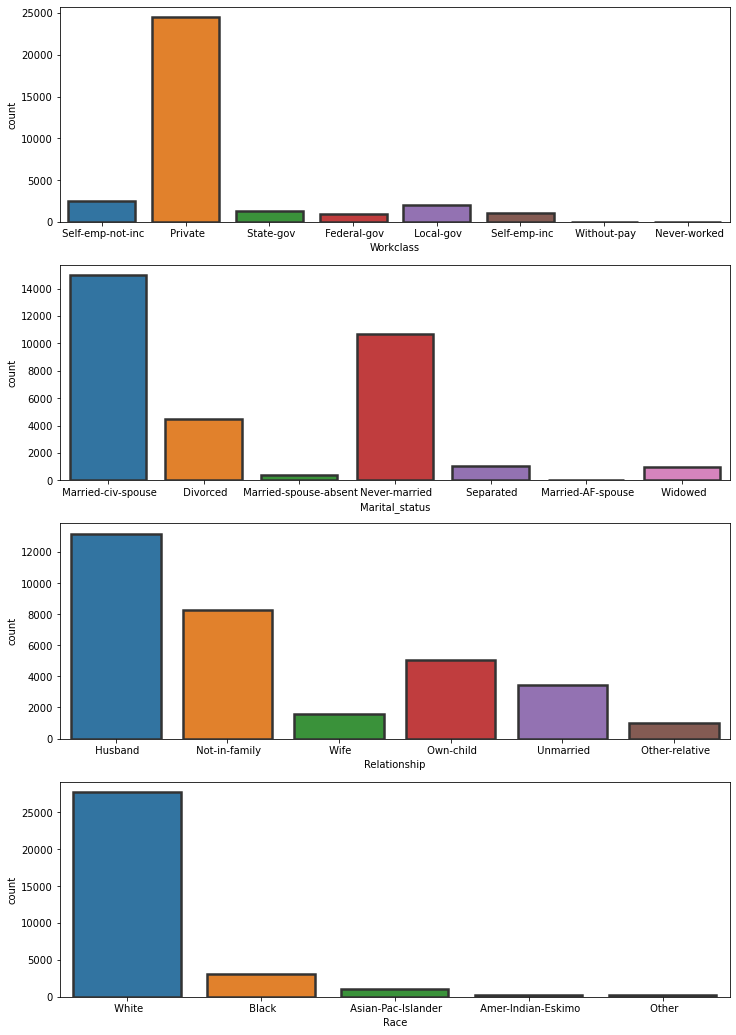

In [21]:
#Nominal/Catagorical data:['Workclass', 'Education', 'Education_num', 'Marital_status', 
#                                 'Occupation', 'Relationship', 'Race', 'Sex','Native_country','Income']


plt.figure(figsize=(12,10))    

plt.subplot(411)    
sns.countplot(x='Workclass',data=data,edgecolor=".2",linewidth=2.5)
print(data['Workclass'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')
    

plt.subplot(412)    
sns.countplot(x='Marital_status',data=data,edgecolor=".2",linewidth=2.5)
print(data['Marital_status'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplot(413)    
sns.countplot(x='Relationship',data=data,edgecolor=".2",linewidth=2.5)
print(data['Relationship'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')


plt.subplot(414)    
sns.countplot(x='Race',data=data,edgecolor=".2",linewidth=2.5)
print(data['Race'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')


plt.subplots_adjust(wspace = 0.4, hspace = 0.2,top = 1.5)
plt.show()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
-------------------------------------------------------------------------------------------------------------------
9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64
-------------------------------------------------------------------------------------------------------------------


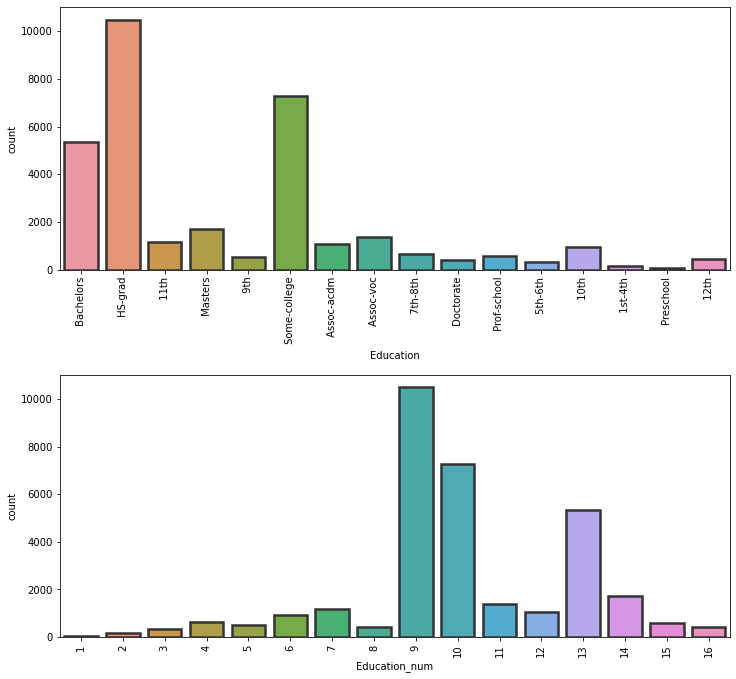

In [22]:
plt.figure(figsize=(12,10))    

plt.subplot(211)    
sns.countplot(x='Education',data=data,edgecolor=".2",linewidth=2.5)
print(data['Education'].value_counts())
plt.xticks(rotation=90)
print('-------------------------------------------------------------------------------------------------------------------')
    

plt.subplot(212)    
sns.countplot(x='Education_num',data=data,edgecolor=".2",linewidth=2.5)
print(data['Education_num'].value_counts())
plt.xticks(rotation=90)
print('-------------------------------------------------------------------------------------------------------------------')


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 1)
plt.show()

 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64
-------------------------------------------------------------------------------------------------------------------
 United-States                 29734
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                         

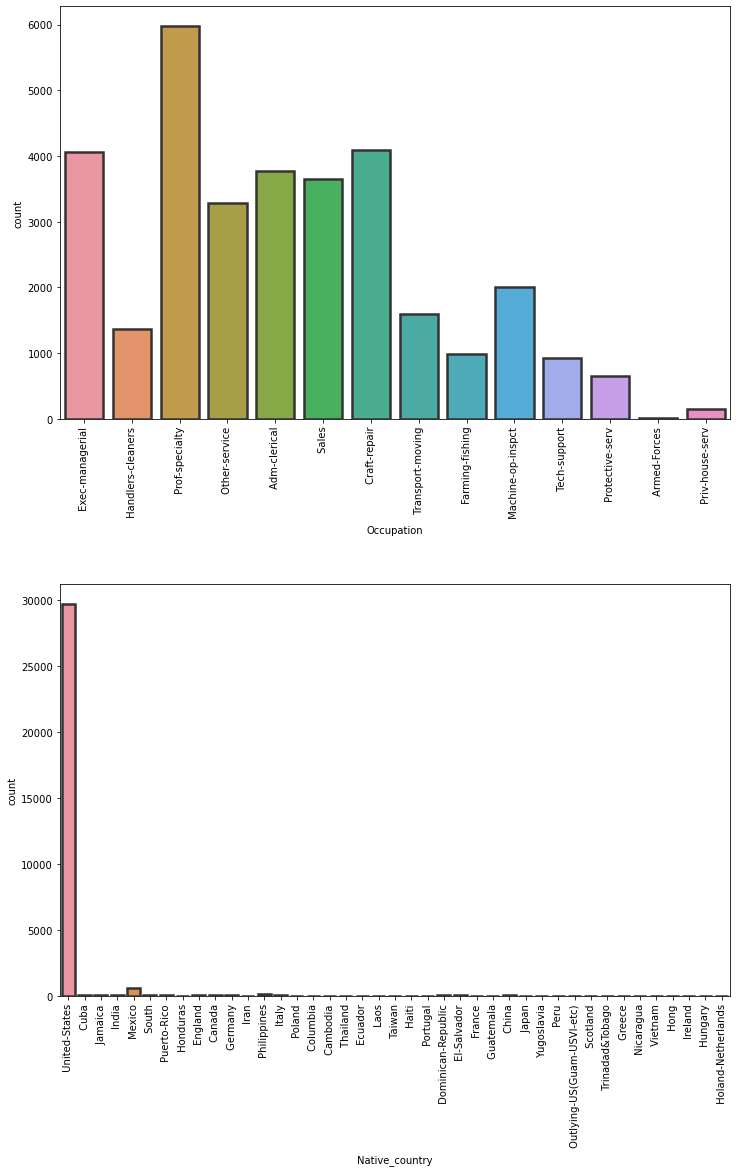

In [23]:
plt.figure(figsize=(12,10))    

plt.subplot(211)    
sns.countplot(x='Occupation',data=data,edgecolor=".2",linewidth=2.5)
print(data['Occupation'].value_counts())
plt.xticks(rotation=90)
print('-------------------------------------------------------------------------------------------------------------------')


plt.subplot(212)    
sns.countplot(x='Native_country',data=data,edgecolor=".2",linewidth=2.5)
print(data['Native_country'].value_counts())
plt.xticks(rotation=90)
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 1.5)
plt.show()

 Male      21774
 Female    10762
Name: Sex, dtype: int64
-------------------------------------------------------------------------------------------------------------------
0.0    24697
1.0     7839
Name: Income, dtype: int64
-------------------------------------------------------------------------------------------------------------------


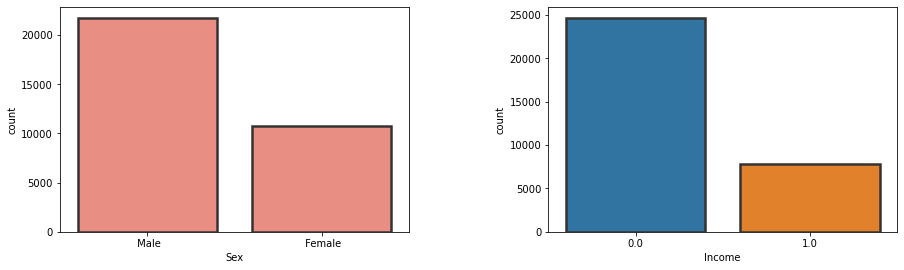

In [24]:
plt.figure(figsize=(15,5))    

plt.subplot(221)    
sns.countplot(x='Sex',data=data,edgecolor=".2",linewidth=2.5,color="salmon")
print(data['Sex'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')


plt.subplot(222)    
sns.countplot(x='Income',data=data,edgecolor=".2",linewidth=2.5)
print(data['Income'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')

plt.subplots_adjust(wspace = 0.4, hspace = 0.2,top = 1.5)
plt.show()

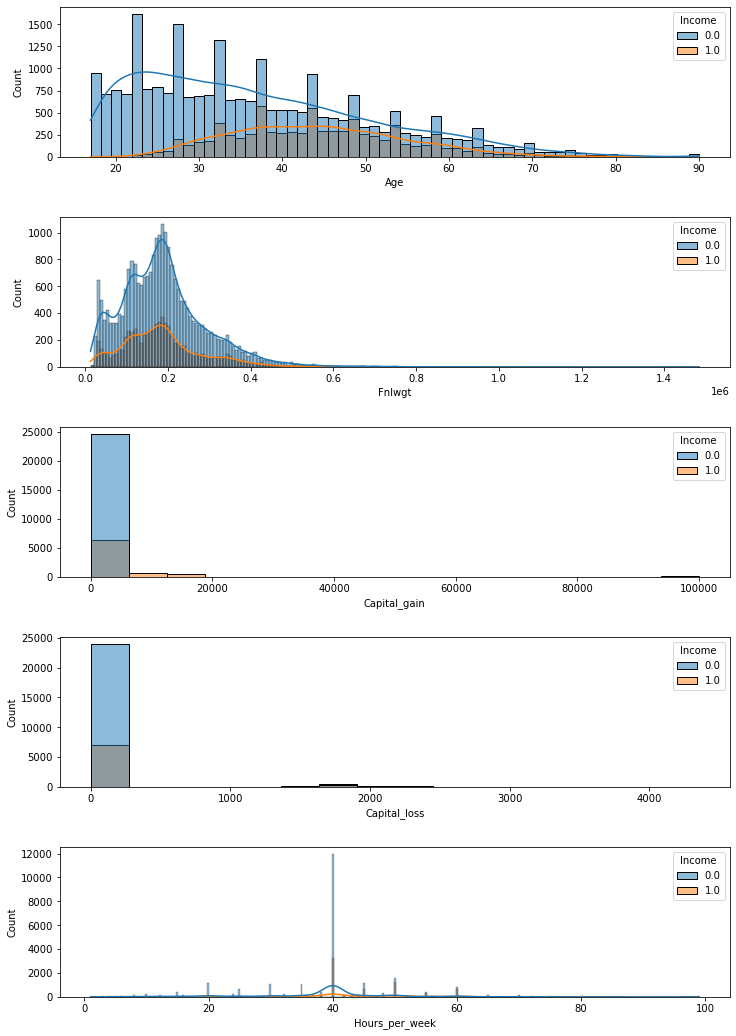

In [25]:
# Visulaization of Ordinal/numerical data  :['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']

plt.figure(figsize=(12,10))


plt.subplot(511)
sns.histplot(x='Age',data=data,hue='Income',kde=True)


plt.subplot(512)
sns.histplot(x='Fnlwgt',data=data,hue='Income',kde=True)


plt.subplot(513)
sns.histplot(x='Capital_gain',data=data,hue='Income')

plt.subplot(514)
sns.histplot(x='Capital_loss',data=data,hue='Income')

plt.subplot(515)
sns.histplot(x='Hours_per_week',data=data,hue='Income',kde=True)


plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 1.5)
plt.show()


In [26]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

Text(0.5, 1.0, 'Income wrt Age')

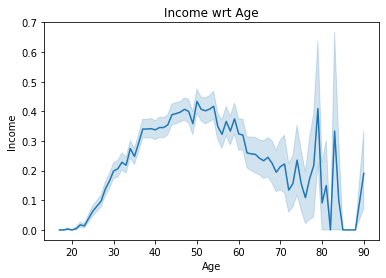

In [27]:
# Bivariate Visulaization of Ordinal/numerical data  :['Age','Fnlwgt','Capital_gain','
#                                                             Capital_loss','Hours_per_week'] wrt Income

sns.lineplot(y='Income',x='Age',data=data)
plt.title('Income wrt Age')



Text(0.5, 1.0, 'Income wrt Fnlwgt')

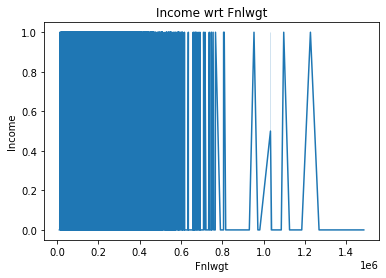

In [28]:
sns.lineplot(y='Income',x='Fnlwgt',data=data)
plt.title('Income wrt Fnlwgt')

Text(0.5, 1.0, 'Income wrt Capital_gain')

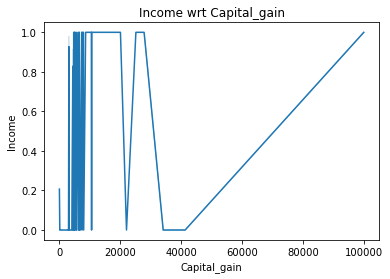

In [29]:
sns.lineplot(y='Income',x='Capital_gain',data=data)
plt.title('Income wrt Capital_gain')


Text(0.5, 1.0, 'Income wrt Capital_loss')

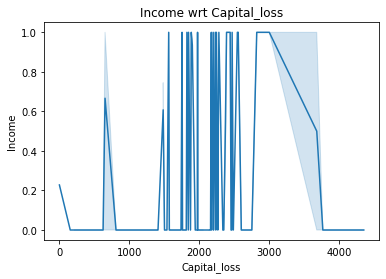

In [30]:
sns.lineplot(y='Income',x='Capital_loss',data=data)
plt.title('Income wrt Capital_loss')

Text(0.5, 1.0, 'Income wrt Hours_per_week')

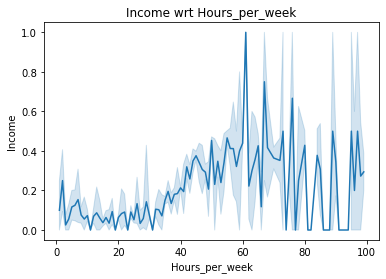

In [31]:
sns.lineplot(y='Income',x='Hours_per_week',data=data)
plt.title('Income wrt Hours_per_week')


In [32]:
#Nominal/Catagorical data:['Workclass', 'Education', 'Education_num', 'Marital_status', 
#                                 'Occupation', 'Relationship', 'Race', 'Sex','Native_country','Income']

#Ordinal/numerical data  :['Age','Fnlwgt','Capital_gain','Capital_loss','Hours_per_week']

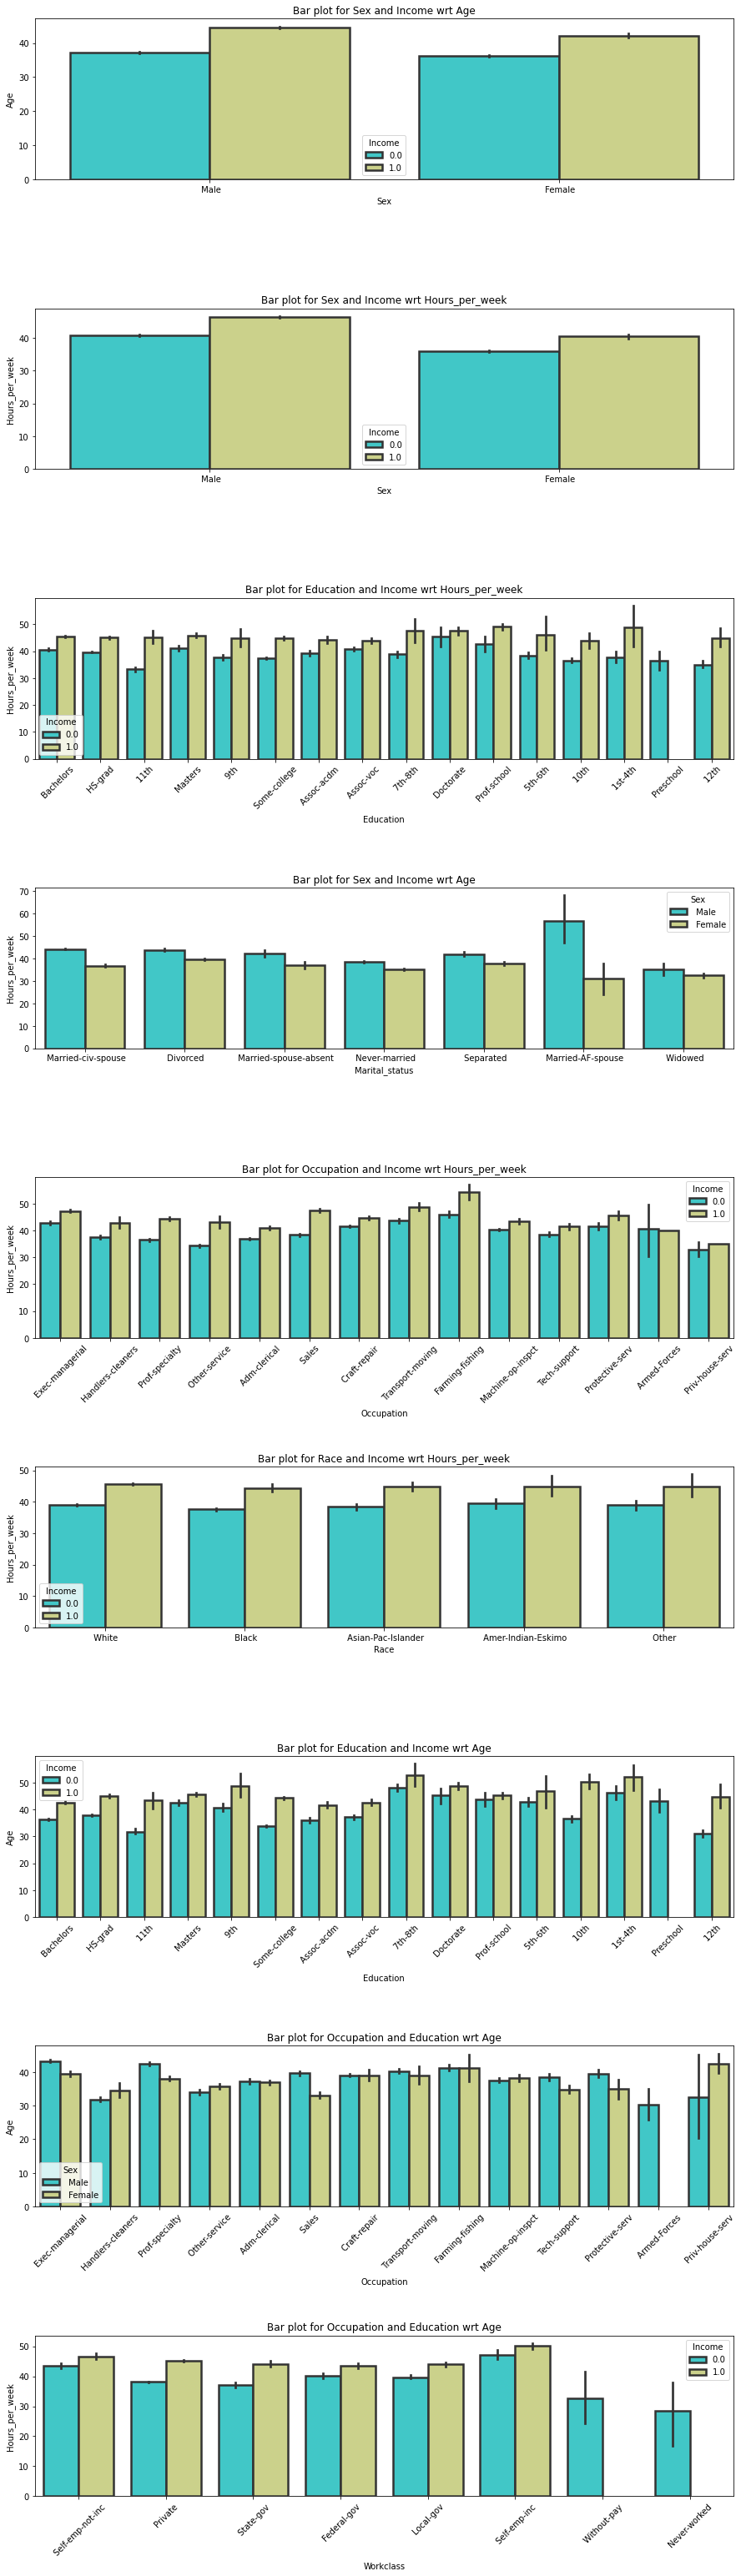

In [33]:
plt.figure(figsize=(15,30))


plt.subplot(911)
sns.barplot(x='Sex',y='Age',hue='Income',data=data,palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Bar plot for Sex and Income wrt Age')

plt.subplot(912)
sns.barplot(x='Sex',y='Hours_per_week',hue='Income',data=data,palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Bar plot for Sex and Income wrt Hours_per_week')


plt.subplot(913)
sns.barplot(x='Education',y='Hours_per_week',hue='Income',data=data,palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Bar plot for Education and Income wrt Hours_per_week')
plt.xticks(rotation=45)

plt.subplot(914)
sns.barplot(x='Marital_status',y='Hours_per_week',hue='Sex',data=data,palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Bar plot for Sex and Income wrt Age')

plt.subplot(915)
sns.barplot(x='Occupation',y='Hours_per_week',hue='Income',data=data,palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Bar plot for Occupation and Income wrt Hours_per_week')
plt.xticks(rotation=45)

plt.subplot(916)
sns.barplot(x='Race',y='Hours_per_week',hue='Income',data=data,palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Bar plot for Race and Income wrt Hours_per_week')

plt.subplot(917)
sns.barplot(x='Education',y='Age',hue='Income',data=data,palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Bar plot for Education and Income wrt Age')
plt.xticks(rotation=45)

plt.subplot(918)
sns.barplot(x='Occupation',y='Age',hue='Sex',data=data,palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Bar plot for Occupation and Education wrt Age')
plt.xticks(rotation=45)

plt.subplot(919)
sns.barplot(x='Workclass',y='Hours_per_week',hue='Income',data=data,palette='rainbow',errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Bar plot for Occupation and Education wrt Age')
plt.xticks(rotation=45)

plt.subplots_adjust(wspace = 0.4, hspace = 0.8,top = 1.5)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

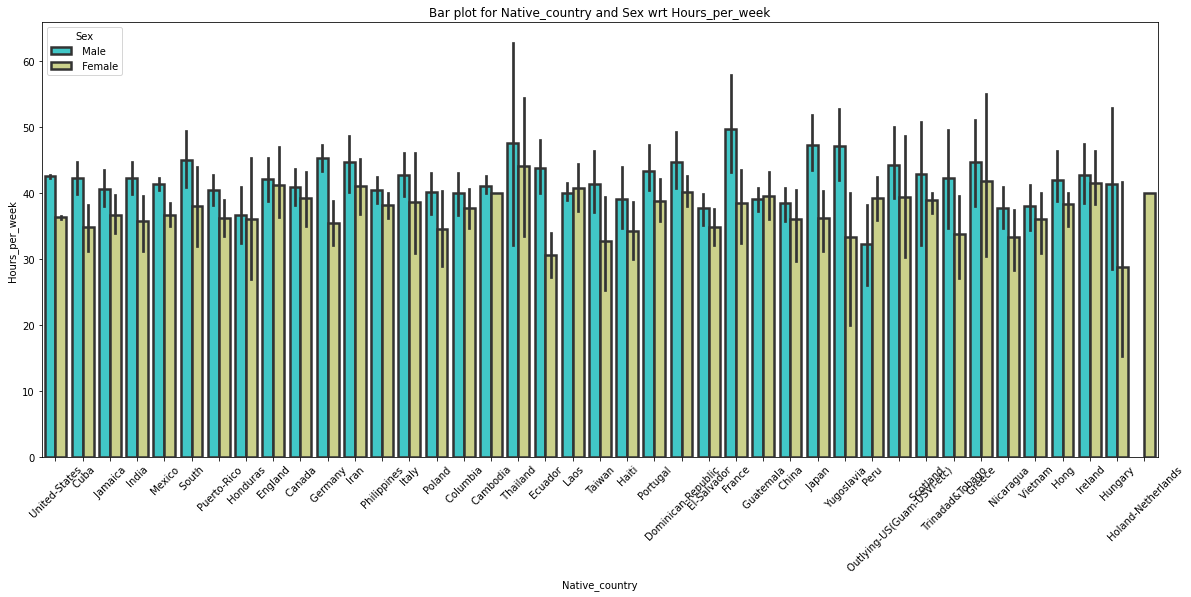

In [34]:
plt.figure(figsize=(20,8))
sns.barplot(x='Native_country',y='Hours_per_week',hue='Sex',data=data,palette='rainbow',
            errcolor=".2", edgecolor=".2",linewidth=2.5)
plt.title('Bar plot for Native_country and Sex wrt Hours_per_week')
plt.xticks(rotation=45)

In [35]:
#Encoding of DataFrame

from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=OE.fit_transform(data[i].values.reshape(-1,1))

In [36]:
print('Data types of dataset after applying ordinal encoding ---->\n')
data.dtypes

Data types of dataset after applying ordinal encoding ---->



Age                 int64
Workclass         float64
Fnlwgt              int64
Education         float64
Education_num       int64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain        int64
Capital_loss        int64
Hours_per_week      int64
Native_country    float64
Income            float64
dtype: object

In [37]:
# Checking for Correlation 
data.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.040463,-0.076448,-0.010551,0.036224,-0.266142,0.001756,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234039
Workclass,0.040463,1.000000,-0.024189,0.004852,0.003412,-0.020506,0.007285,-0.057904,0.048322,0.071522,0.031497,0.002661,0.042208,-0.001691,0.002747
Fnlwgt,-0.076448,-0.024189,1.000000,-0.028065,-0.043353,0.028154,-0.000073,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.063073,-0.009521
Education,-0.010551,0.004852,-0.028065,1.000000,0.359105,-0.038413,-0.041258,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.075498,0.079361
Education_num,0.036224,0.003412,-0.043353,0.359105,1.000000,-0.069196,0.070965,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.088044,0.335299
Marital_status,-0.266142,-0.020506,0.028154,-0.038413,-0.069196,1.000000,0.034901,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.020892,-0.199187
Occupation,0.001756,0.007285,-0.000073,-0.041258,0.070965,0.034901,1.000000,-0.037443,-0.004789,0.047683,0.018013,0.009644,-0.012851,-0.002124,0.034490
Relationship,-0.263744,-0.057904,0.008859,-0.011060,-0.094424,0.185542,-0.037443,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.010838,-0.250955
Race,0.029116,0.048322,-0.021484,0.014307,0.031998,-0.067942,-0.004789,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.116848,0.071855
Sex,0.088708,0.071522,0.027113,-0.027426,0.012181,-0.129425,0.047683,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,0.001745,0.215984


<AxesSubplot:>

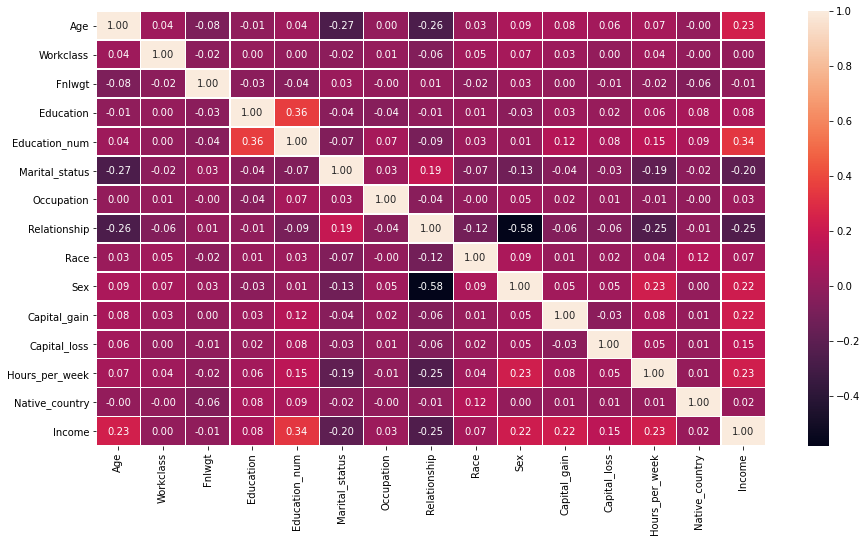

In [38]:
#Visulaization of Correlation
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),linecolor='white',annot=True,fmt='0.2f',linewidth=0.1)

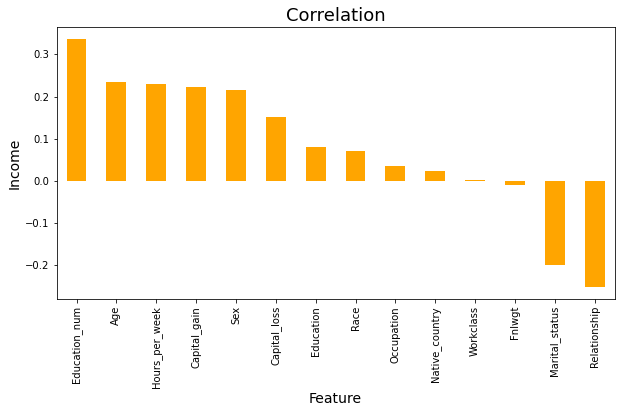

In [39]:
#Visualization of correlation of target variable with other variables
plt.figure(figsize=(10,5))
data.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='orange')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Income',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [40]:
## Statistical Summary
data.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32536.000000,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,3.094357,1.897843e+05,10.297547,10.081725,2.611384,6.139476,1.446552,3.665816,0.669228,1078.410069,87.370912,40.440343,36.419136,0.240933
std,13.638193,1.107449,1.055563e+05,3.870195,2.571622,1.506304,3.973089,1.607087,0.848858,0.470498,7388.068465,403.107737,12.347079,6.053903,0.427656
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.369932e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


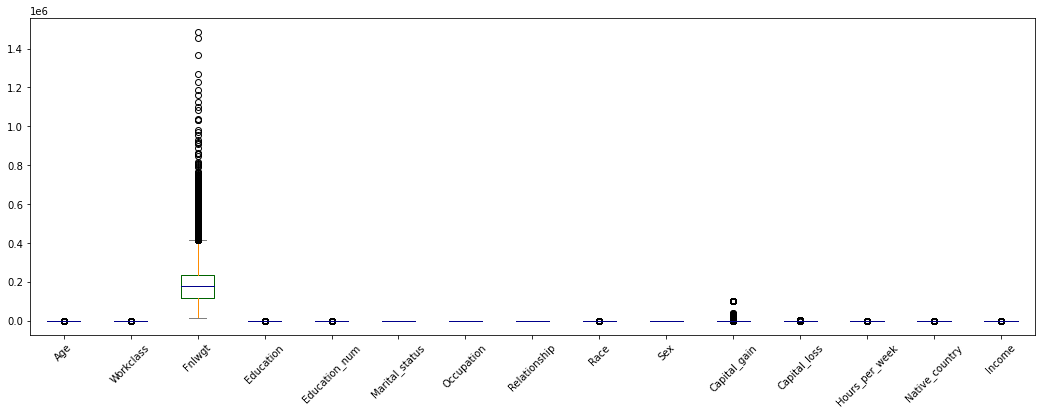

In [41]:
#Checking for Outliers:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot(kind='box', color=color,figsize=(18,7))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

In [42]:
from numpy import percentile
data_new=data
data_new.shape
att_=att_ = ['Fnlwgt','Capital_gain','Capital_loss']
array=[None]*len(att_)
for x,i in enumerate(att_):
    q25,q75=percentile(data[i],25),percentile(data[i],75)
    iqr=q75-q25
    cut_off=iqr*1.5
    lower,upper=q25-cut_off,q75+cut_off
    array[x]=[i,lower,upper]
    data_new[i]=data_new[i].apply(lambda x: lower if x<lower else (upper if x>upper else x))

NameError: name 'clist' is not defined

In [ ]:
array

In [ ]:
#Checking for Outliers after removing outliers:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data_new.plot(kind='box', color=color,figsize=(18,7))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_new.skew()

In [ ]:
data_new.head()

In [ ]:
#Splitting the data inrto train and test

ds_x=data_new.drop(['Income'],axis=1)
y=data_new['Income']

In [ ]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(ds_x,y)

In [ ]:
print(y_over.value_counts())
y_over.value_counts().plot(kind='bar',color='pink')

In [ ]:
print('Shape of x_over:',x_over.shape)
print('Shape of y_over:',y_over.shape)

In [ ]:
#lets bring all features to a common scale

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_x)



x=pd.DataFrame(x,columns=ds_x.columns)
x.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [ ]:
#Finding out best random best state

maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred_train=dtc.predict(x_train)
    pred_test=dtc.predict(x_test)
    dtc_Accu=accuracy_score(y_test,pred_test)
    if dtc_Accu>maxAccu:
        maxAccu=dtc_Accu
        maxRS=i
print('Best Accuracy is : ',maxAccu*100,'on random state :' ,maxRS)

In [334]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=16)

In [338]:
models = [['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()],
               ['Extratrees :',ExtraTreesClassifier()],
               ['KNeighbours :', KNeighborsClassifier(n_neighbors = 2)],
               ['LinearSVC :', LinearSVC(random_state=0, tol=1e-5)],
               ['NB :' , GaussianNB()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['Xgboost: ', XGBClassifier()]]

In [339]:
print("Accuracy Score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (accuracy_score(y_test, predictions))*100)

Accuracy Score----->


DecisionTree : 84.50637694851204
RandomForest : 88.25156893177677
Extratrees : 88.09636277751535
KNeighbours : 72.08988460759835
LinearSVC : 50.34752682367232
NB : 71.33409811728187
AdaBoostClassifier : 87.46879006680612
GradientBoostingClassifier:  88.85214926783183
[17:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  89.29077535596194


In [340]:
print("f1_score----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (f1_score(y_test, predictions))*100)

f1_score----->


DecisionTree : 84.45735910258144
RandomForest : 88.15502183406112
Extratrees : 87.98531311620316
KNeighbours : 69.98112933662361
LinearSVC : 0.21697857336588008
NB : 75.62822719449225
AdaBoostClassifier : 87.46032817881019
GradientBoostingClassifier:  88.76801740549361
[17:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  89.1114922813036


In [341]:
print("Confusion Matrix----->")
print('\n')


for name,model in models:
    model = model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name,'\n', (confusion_matrix(y_test, predictions))*100)

Confusion Matrix----->


DecisionTree : 
 [[625300 120500]
 [109800 626300]]
RandomForest : 
 [[664700  81100]
 [ 91400 644700]]
Extratrees : 
 [[658500  87300]
 [ 87500 648600]]
KNeighbours : 
 [[586200 159600]
 [254000 482100]]
LinearSVC : 
 [[745300    500]
 [735300    800]]
NB : 
 [[398000 347800]
 [ 77000 659100]]
AdaBoostClassifier : 
 [[648600  97200]
 [ 88500 647600]]
GradientBoostingClassifier:  
 [[663900  81900]
 [ 83300 652800]]
[17:33:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost:  
 [[673800  72000]
 [ 86700 649400]]


In [342]:
print('Cross_val_scores:')
print('\n')

names=[]
predictions=[]


for name,model in models:
    result=cross_val_score(model,x_over,y_over,cv=5)
    predictions.append(result)
    names.append(name)
    result="%s : %f (%f)"%(name,result.mean()*100,result.std())
    print(result)

Cross_val_scores:


DecisionTree : : 82.712609 (0.091326)
RandomForest : : 86.526843 (0.094429)
Extratrees : : 86.838611 (0.085861)
KNeighbours : : 74.134541 (0.016010)
LinearSVC : : 50.238891 (0.003692)
NB : : 72.213248 (0.014541)
AdaBoostClassifier : : 85.761536 (0.069254)
GradientBoostingClassifier:  : 86.745474 (0.081133)
[17:41:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:41:17] WARNING: C:/Users/Administrator/workspace

In [346]:
### Performing Hyper parameter tuning to increse model performance of XGBoostregressor.

            
param_tuning = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
             }
#Create new XGB object
XG_2 = XGBClassifier()

#Use GridsearchCV
GCV = GridSearchCV(estimator = XG_2,param_grid = param_tuning,cv = 5,n_jobs = -1,verbose = 1)

#Fit the model
best_model = GCV.fit(x_over,y_over)

#checking for best parameters
GCV.best_params_

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
[20:04:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'colsample_bytree': 0.8,
 'gamma': 1,
 'max_depth': 3,
 'min_child_weight': 10,
 'subsample': 1.0}

In [349]:
#Creating Final Model after hyperparameter tuning for XGBRegressor

f_mod_xgb= XGBClassifier(
        colsample_bytree = 0.8,
        max_depth = 3,
        min_child_weight = 10,
        subsample = 1.0,
        gamma=1)


f_mod_xgb.fit(x_train, y_train)

y_pred = f_mod_xgb.predict(x_test)

# Summary of the predictions made by the classifier
print('classification_report','\n',classification_report(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
print('Confusion matrix','\n',confusion_matrix(y_test, y_pred))

print('-------------------------------------------------------------------------------------------------------------------')
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
print('Accuracy score for XGBoost Classifier is :',accuracy_score(y_pred,y_test))
print('-------------------------------------------------------------------------------------------------------------------')
scores = cross_val_score(f_mod_xgb, x_over, y_over, cv =5)
print('-------------------------------------------------------------------------------------------------------------------')

print('Model accuracy: ',np.mean(scores)*100)

[20:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
classification_report 
               precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      7458
         1.0       0.91      0.89      0.90      7361

    accuracy                           0.90     14819
   macro avg       0.90      0.90      0.90     14819
weighted avg       0.90      0.90      0.90     14819

-------------------------------------------------------------------------------------------------------------------
Confusion matrix 
 [[6775  683]
 [ 837 6524]]
-------------------------------------------------------------------------------------------------------------------
Accuracy score for XGBoost Classifier is : 0.8974289763141913

### After hyper parameter tuning, model accuracy is 87.30%

AUC-ROC score of LogisticRegression: 0.8973565556756928
-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------


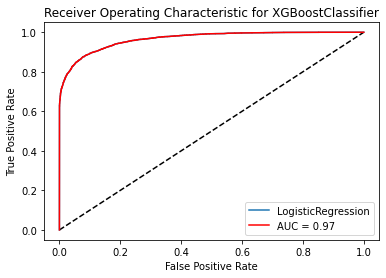

In [351]:
## Checking fro AUC-ROC Score

y_prob=f_mod_xgb.predict_proba(x_test)[:,1] 
pred=f_mod_xgb.predict(x_test)
y_pred = np.where(y_prob > 0.5, 1, 0)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
print('AUC-ROC score of LogisticRegression:',auc_roc)
print('-------------------------------------------------------------------------------------------------------------------')
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc = auc(fpr, tpr)

print('-------------------------------------------------------------------------------------------------------------------')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.axis('tight')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.title('Receiver Operating Characteristic for XGBoostClassifier')
plt.show()

### AUC score of model is 97%

In [352]:
#saving the model for deployment to client

import joblib

joblib.dump(f_mod_xgb,'census_income_xgb.obj')

['census_income_xgb.obj']